## Final Project Week 1 - Machine Learning Model (NY data only)

In [1]:
# Import denpendencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn import linear_model 
import statsmodels.api as sm

In [2]:
# Upload the CSV files 
file_load = "Resources/NYDataOnly.csv"
df = pd.read_csv(file_load)
df.head()

,DATE,INFLATION,GAS_PRICE,UNEMPLYMENT_RATES,MORTGAGTE_DATA,FEDERAL_FUND,NY
0,1/1/2011,220.223,3.148,9.1,4.8,0.17,462700
1,2/1/2011,221.309,3.264,9.0,4.9,0.16,466200
2,3/1/2011,223.467,3.615,9.0,5.0,0.14,465600
3,4/1/2011,224.906,3.852,9.1,4.9,0.10,469500
4,5/1/2011,225.964,3.960,9.0,4.9,0.09,471300


Text(0.5, 1.0, 'Gas Price vs Housing')

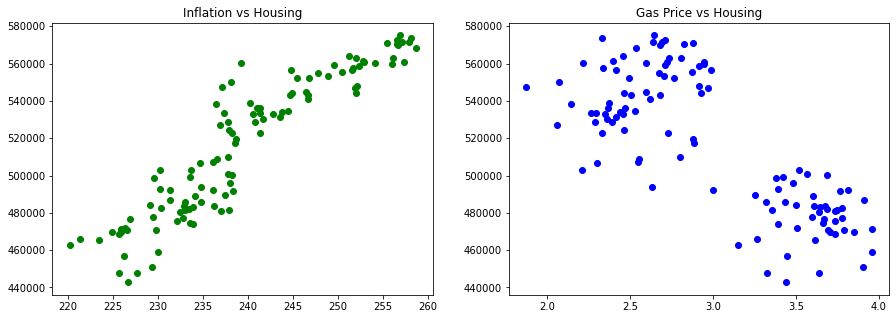

In [3]:
# Plot the code 
fig, ((ax1),(ax2)) = plt.subplots(1,2,figsize = (15,5))
ax1.scatter(df["INFLATION"],df["NY"], c="green")
ax1.set_title('Inflation vs Housing')
ax2.scatter(df["GAS_PRICE"], df["NY"], c="blue")
ax2.set_title('Gas Price vs Housing')

In [4]:
# Create Feature and Target variable
X = df.copy()
X = X[["INFLATION", "GAS_PRICE"]]
# X = X.drop(columns=["DATE", "NY"], axis=1)

y = (df["NY"]/1000).values.reshape(-1,1)


In [5]:
# Structure of X and y
print(X.shape)
print(y.shape)

(111, 2)
(111, 1)


In [6]:
# Columns 
columns = df.columns.tolist()
columns

['DATE',
 'INFLATION',
 'GAS_PRICE',
 'UNEMPLYMENT_RATES',
 'MORTGAGTE_DATA',
 'FEDERAL_FUND',
 'NY']

In [7]:
# Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,INFLATION,GAS_PRICE
15,230.085,3.958
44,238.031,3.484
89,251.989,2.970
90,252.006,2.928
9,226.421,3.506


### Multiple Regression Model

In [8]:
# Model 
model = LinearRegression()

#Fit the model 
model.fit(X_train, y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

predictions = model.predict(X_test)


Intercept: [-39.22152731]
Coefficients: [[  2.61856546 -23.8635225 ]]


In [13]:
# fig, ax = plt.subplots()
# plt.scatter(model.predict(X_train), model.predict(X_train)- y_train, c="blue", label="Training Date")
# plt.scatter(model.predict(X_test), model.predict(X_test)-y_test, c="orange", label="Testing Data")
# plt.boxplot(predictions, labels=["NY"])
# plt.title("Multivariant Regression on Housing")
# plt.legend()
# plt.grid()
# plt.show()

In [14]:
# prediction with sklearn
# New_Inflation = 300
# New_Gas_Price = 7 
# print ('Predicted Housing Price: \n', model.predict([[New_Inflation ,New_Gas_Price]]))

# # with statsmodels
# # X = sm.add_constant(X) # adding a constant
 
# model = sm.OLS(y, X).fit()
# predictions = model.predict(X) 
 
# print_model = model.summary()
# print(print_model)

In [15]:
# plt.scatter(X["INFLATION"], y)
# plt.plot(X["INFLATION"], predictions, c="r")
# plt.show

In [ ]:
# from tkinter import *
# from tkinter import ttk

# Model 
model = LinearRegression()

# Fit the model 
model.fit(X_train, y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# predictions = model.predict(X_test)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()
canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', model.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', model.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Inflation: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Gas Price: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

def values(): 
    global New_Inflation #our 1st input variable
    New_Inflation = float(entry1.get()) 
    
    global New_Gas_Price #our 2nd input variable
    New_Gas_Price = float(entry2.get()) 
    
    Prediction_result  = ('Housing Price: ', model.predict([[New_Inflation ,New_Gas_Price]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Housing Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['INFLATION'].astype(float),df['NY'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['NY']) 
ax3.set_xlabel('Inflation')
ax3.set_title('Inflation Vs. Housing Price')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['GAS_PRICE'].astype(float),df['NY'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['NY']) 
ax4.set_xlabel('Gas Price')
ax4.set_title('Gas Price Vs. Housing Price')

root.mainloop()

Intercept: [-39.22152731]
Coefficients: [[  2.61856546 -23.8635225 ]]


In [ ]:
# with sklearn
Intercept_result = ('Intercept: ', model.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

In [ ]:
# with sklearn
Coefficients_result  = ('Coefficients: ', model.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

In [ ]:
# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Inflation: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

In [ ]:
# Create the function 
# def RegressionModel():
#     y = df[city]/1000
        
    
#     # Train the datasets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
#     # Create a model 
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     training_score = model.score(X_train, y_train)
#     testing_score = model.score(X_test, y_test)
#     print(f"Training Score: {training_score}.")
#     print(f"Testing Score: {testing_score}.")
#     print(f"--------------------------------")
    
#     # Predict the model 
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f"Coefficient of the model: {model.coef_}")              
#     print(f"Model Intercept: {model.intercept_}.")
#     print(f"----------------------------------")
#     print(f"mean squared error (MSE): {mse}")
#     print(f"R-squared (R2 ): {r2}")
    
#     # Visualize the plot 
#     plt.scatter(model.predict(X_train), model.predict(X_train)- y_train, c="blue", label="Training Date")
#     plt.scatter(model.predict(X_test), model.predict(X_test)-y_test, c="orange", label="Testing Data")
#     plt.legend()
#     plt.title("Multivariant Regression on Housing")
#     plt.show()   
    
#     # Min and Max values of each city Housing Price
#     x_min = X_test.min()
#     x_max = X_test.max()
# #     y_min = model.predict(x_min)
# #     y_max = model.predict(x_max)
#     print(f"------------------------------------------------")
#     print(f"Min Inflation: ${x_min}, Max Inflation: ${x_max}")
# #     print(f"Predicted Mix Housing Price: ${y_min*1000}, Predicted Max Housing Price ${y_max*1000}.")
        
#     return   

In [ ]:
# Enter the city name 
# city = input("Enter the City Name: ")
# RegressionModel()

In [ ]:
# Standardize the data
# scaler = StandardScaler()

# # Fit the model 
# X_scaled = scaler.fit(X_train)

# # Scale the model 
# X_train_scaled = X_scaled.transform(X_train)
# X_test_scaled = X_scaled.transform(X_test)

In [ ]:
# Random Forest model 

# # Create a random forest model 
# rf_model = RandomForestClassifier(n_estimators=128, random_state=42)

# # fit the model 
# rf_model = rf_model.fit(X_train_scaled, y_train)

# # Making predictions using testing data
# predictions = rf_model.predict(X_test_scaled)

In [ ]:
# # Calculating the accuracy score
# acc_score = accuracy_score(y_test, predictions)
# acc_score
X_train_scaled[:5]

## Deep Learning Model 

In [ ]:
# Define the model - deep neural net
# number_input_features = len(X_train_scaled[0])
# hidden_nodes_layer1 = 20
# hidden_nodes_layer2 = 10
# hidden_nodes_layer3 = 5

# nn = tf.keras.models.Sequential()

# # First hidden layer
# nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer1, input_dim = number_input_features, activation="relu"))

# nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer2, activation="relu"))

# nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer3, activation="relu"))

# nn.add(tf.keras.layers.Dense(units= 1, activation="sigmoid"))

# # Compile the model 
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# # Train the model 
# fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# # Evaluate the model using the test data 
# model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


In [ ]:
# Create the model of linear regreession on NY city housing data
# model = LinearRegression()

# # Fit the model 
# model.fit(X, y)

In [ ]:
# Predict the y 
# y_pred = model.predict(X)
# y_pred[:5]

In [ ]:
# Visualize the data 
# plt.scatter(X, y)
# plt.plot(X, y_pred, color="red")
# plt.show()

## Quantifying the model

In [ ]:
# Score the prediction with MSE and R2
# from sklearn.metrics import r2_score, mean_squared_error

# mse = mean_squared_error(y, y_pred)
# r2 = r2_score(y, y_pred)

# print(f"Mean Squared Error (MSE): {round(mse, 2)}")
# print(f"R-squared (R2): {round(r2, 4)}")

In [ ]:
# Overall score of the model 
# model_score = model.score(X, y)
# model_score

## Model Validation 

In [ ]:
# Testing and Training data 
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# # Fit the model using training data
# model.fit(X_train, y_train)

In [ ]:
# Score the model using the unseen testing data
# model.score(X_test, y_test)